# Branin Function Example

The **Branin function** is a 2-dimensional continuous benchmark function commonly used to test optimization algorithms. It has **three global minima** and multiple local minima, making it ideal for demonstrating iterative optimization workflows like AMLRO.

## Function Domain

| Variable | Bounds  |
|----------|---------|
| x₁       | [-5, 10] |
| x₂       | [0, 15]  |

## Global Minima
- (-π, 12.275)
- (π, 2.275)
- (9.42478, 2.475)

All minima have a function value of approximately **0.3979**. since we going to use coaser grid Minima ~0.40

## Purpose
- Demonstrate AMLRO workflow with a computational benchmark.
- Show **reaction space generation**, **training set creation**, and **active learning prediction**.



Click the badge below to open this notebook in **Google Colab**:

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RxnRover/amlro/blob/main/notebooks/Branin_example.ipynb)


In [2]:
from amlro.optimizer import *
from amlro.generate_reaction_conditions import *
from amlro.generate_training_data import *
import random
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
config = {
            "continuous": {
                "bounds": [[-5, 10], [0, 15]], #
                "resolutions": [0.1, 0.1],
                "feature_names": ["f1", "f2"],
            },
            "categorical": {
                "feature_names": [],
                "values": []
            },
            "objectives": ['fx'],
            "directions": ['min'],

        }

In [4]:
exp_dir = 'Branin_test'
sampling = 'sobol'
training_size = 20
regresor_model = 'gb'

# **Step 1: Generate Reaction Space**
Reaction space generation serves two purposes:

1. Construct the **full combinatorial reaction space** based on user-defined
   continuous and categorical parameters.
2. Select an **initial subset of reactions** for training using a chosen
   sampling strategy.

Please run the following cell/code line.

In [19]:
get_reaction_scope(config=config, sampling=sampling, training_size=training_size, write_files=True, exp_dir=exp_dir)

d:\amlro\venv\lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


(         f1    f2
 0      -5.0   0.0
 1      -5.0   0.1
 2      -5.0   0.2
 3      -5.0   0.3
 4      -5.0   0.4
 ...     ...   ...
 22796  10.0  14.6
 22797  10.0  14.7
 22798  10.0  14.8
 22799  10.0  14.9
 22800  10.0  15.0
 
 [22801 rows x 2 columns],
          f1    f2
 0      -5.0   0.0
 1      -5.0   0.1
 2      -5.0   0.2
 3      -5.0   0.3
 4      -5.0   0.4
 ...     ...   ...
 22796  10.0  14.6
 22797  10.0  14.7
 22798  10.0  14.8
 22799  10.0  14.9
 22800  10.0  15.0
 
 [22801 rows x 2 columns],
      f1    f2
 0  -5.0   0.0
 1   2.5   7.5
 2   6.3   3.7
 3  -1.2  11.2
 4   0.6   5.6
 5   8.1  13.1
 6   4.4   1.9
 7  -3.1   9.4
 8  -2.2   4.7
 9   5.3  12.2
 10  9.1   0.9
 11  1.6   8.4
 12 -0.3   2.8
 13  7.2  10.3
 14  3.4   6.6
 15 -4.1  14.1
 16 -3.6   7.0
 17  3.9  14.5
 18  7.7   3.3
 19  0.2  10.8)

# **Define branin objective function**

The Branin function is defined as:

\[
f(x_1, x_2) = a (x_2 - b x_1^2 + c x_1 - r)^2 + s (1 - t) \cos(x_1) + s
\]

with typical constants:

- \(a = 1\)  
- \(b = 5.1 / (4 \pi^2)\)  
- \(c = 5 / \pi\)  
- \(r = 6\)  
- \(s = 10\)  
- \(t = 1 / (8 \pi)\)

In [6]:
def branin(x):
    
    x1, x2 = np.array(x)

    a = 1.0
    b = 5.1 / (4.0 * np.pi**2)
    c = 5.0 / np.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * np.pi)
    
    
    return a * (x2 - b * x1**2 + c * x1 - r)**2 + s * (1 - t) * np.cos(x1) + s

# **Step 2: Initial Training Data (closed-loop)**

This step collects **objective results** for the initial parameter combinations.
- objective values are collected by calling branin objective function each iteration.

In [21]:
parameters = []
objectives = []

for i in range(training_size):

    parameters = generate_training_data(exp_dir=exp_dir,config=config,parameters=parameters, obj_values=objectives)
    print(parameters)
    objectives = [branin(parameters)] # Branin objective function

generate_training_data(exp_dir=exp_dir,config=config,parameters=parameters, obj_values=objectives,termination=True)

[-5.0, 0.0]
writing data to training dataset files...
[2.5, 7.5]
writing data to training dataset files...
[6.3, 3.7]
writing data to training dataset files...
[-1.2, 11.2]
writing data to training dataset files...
[0.6, 5.6]
writing data to training dataset files...
[8.1, 13.1]
writing data to training dataset files...
[4.4, 1.9]
writing data to training dataset files...
[-3.1, 9.4]
writing data to training dataset files...
[-2.2, 4.7]
writing data to training dataset files...
[5.3, 12.2]
writing data to training dataset files...
[9.1, 0.9]
writing data to training dataset files...
[1.6, 8.4]
writing data to training dataset files...
[-0.3, 2.8]
writing data to training dataset files...
[7.2, 10.3]
writing data to training dataset files...
[3.4, 6.6]
writing data to training dataset files...
[-4.1, 14.1]
writing data to training dataset files...
[-3.6, 7.0]
writing data to training dataset files...
[3.9, 14.5]
writing data to training dataset files...
[7.7, 3.3]
writing data to traini

# **Step 3: Active Learning Optimization Loop**

This step uses the **initial dataset** to train a model and predict the next batch of parameters for minimizing the objective function

In [7]:
%%capture
parameters = []
objectives = []
for i in range(1):
    parameters = get_optimized_parameters(exp_dir=exp_dir,config=config, parameters_list=parameters,objectives_list=objectives, batch_size=1, model= regresor_model)
    print(parameters)
    #objectives = [[branin(parameters[0])],[branin(parameters[1])]] #if you use batch size = 2 You need to call branin fucntion two time for each parameter set.
    objectives = [[branin(parameters[0])]] #user input

get_optimized_parameters(exp_dir=exp_dir,config=config, parameters_list=parameters,objectives_list=objectives, batch_size=1, termination=True)

In [26]:
df = pd.read_csv(f'{exp_dir}/reactions_data.csv')

Text(0.5, 1.0, 'Trajectories of Objectives')

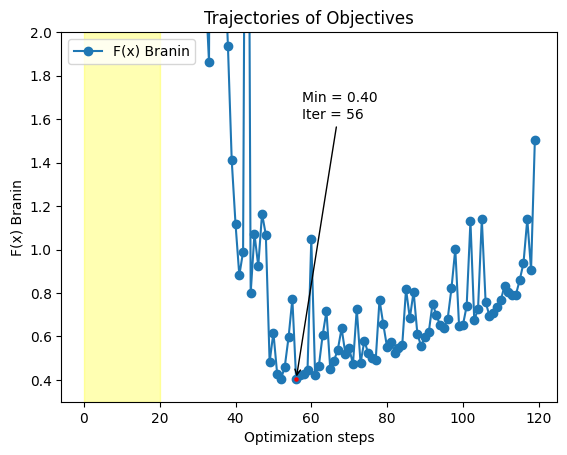

In [ ]:
plt.plot(df['fx'],marker='o', label="F(x) Branin")
plt.axvspan(0, training_size, color='yellow', alpha=0.3)
min_idx = df['fx'].idxmin()
min_val = df['fx'].min()
plt.scatter(min_idx, min_val, color='red', s=5, zorder=5)
plt.annotate(
    f"Min = {min_val:.2f}\nIter = {min_idx}",
    xy=(min_idx, min_val),
    xytext=(min_idx + 1.5, min_val + 1.2),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)
plt.legend(loc='upper left')
plt.xlabel('Optimization steps')
plt.ylabel('F(x) Branin')
plt.ylim(0.30,2)
plt.title('Trajectories of Objectives')

Text(0.5, 1.0, 'Optimization path')

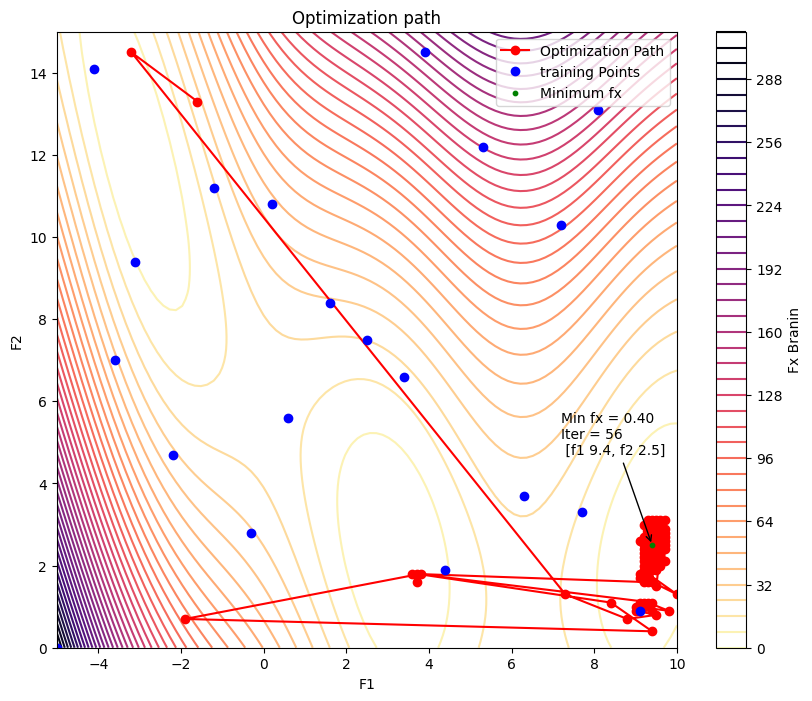

In [49]:
x1 = np.linspace(-5, 10, 100)
x2 = np.linspace(0, 15, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = branin([X1, X2])
plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=50, cmap='magma_r')
plt.colorbar(label='Fx Branin')

plt.plot(df['f1'][training_size:], df['f2'][training_size:], 'o-', color='red', markersize=6, label='Optimization Path')
plt.plot(df['f1'][:training_size], df['f2'][:training_size], 'o', color='blue', markersize=6, label='training Points')

min_idx = df['fx'].idxmin()
min_val = df['fx'].min()
min_f1 = df.loc[min_idx, 'f1']
min_f2 = df.loc[min_idx, 'f2']

# Highlight minimum point
plt.scatter(min_f1, min_f2, color='green', s=10, zorder=5, label='Minimum fx')

# Annotate with value and iteration
plt.annotate(
    f"Min fx = {min_val:.2f}\nIter = {min_idx} \n [f1 {min_f1}, f2 {min_f2}]",
    xy=(min_f1, min_f2),
    xytext=(min_f1 - 2.2, min_f2 + 2.2),  # offset for visibility
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

plt.xlabel('F1')
plt.ylabel('F2')

plt.legend()
plt.title('Optimization path')